In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 获取鸢尾花的数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 鸢尾花数据中有 012 三个分类，现将第三个分类去掉,特征只提取前两个
X = X[y<2,:2]  
y = y[y<2]

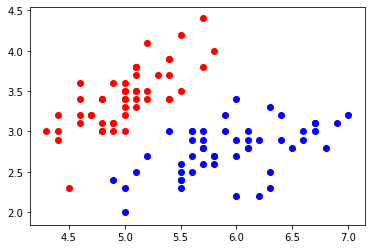

In [4]:
# 绘制图像
plt.scatter(X[y==0,0],X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")

### 使用逻辑回归

In [5]:
from pycharm_knn.LogisticRegression import LogisticRegression
from pycharm_knn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [7]:
log_reg = LogisticRegression()

In [8]:
log_reg.fit(X,y)

LinearRegression()

In [9]:
log_reg.score(X_test,y_test)

1.0

In [10]:
# 查看相应的预测结果,概率有大有效小
log_reg.predict_probe(X_test)

array([0.97982194, 0.91455033, 0.06140504, 0.1999967 , 0.87828322,
       0.02111449, 0.98641998, 0.96024274, 0.09052543, 0.99824125,
       0.9293072 , 0.973067  , 0.74017466, 0.07555361, 0.02602343,
       0.01740274, 0.01043824, 0.92874844, 0.87645971, 0.91455033])

In [11]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

### 绘制其逻决策边界

In [12]:
# 1. 只有两个属性，根据公式求出 x2,作为决策边界的 y 值
def x2(x):
    return (-log_reg.coef_[0]*x-log_reg.intercept_)/log_reg.coef_[1]

In [13]:
# 2.创建 x,y 的数据,从上面的图可以看出 x 就是从 4-8 进行的取值
x_plot = np.linspace(4,8,1000)
y_plot = x2(x_plot)

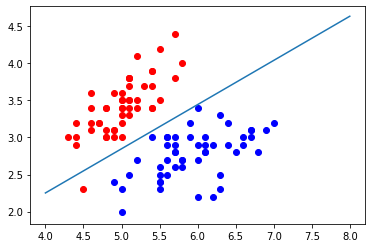

In [14]:
# 3.绘制图形
plt.scatter(X[y==0,0],X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")
plt.plot(x_plot,y_plot)

发现上图上的某一个红色的点异常，这是在线下但是被分到了红色点<br/>
但是最后测试结果的准确率是 1 ，也就是说没有异常的点<br/>
这是因为这个点是在训练数据集的

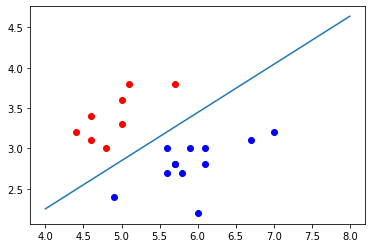

In [15]:
# 仅绘制测试数据集图像,发现没有异常点
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],color="red")
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],color="blue")
plt.plot(x_plot,y_plot)

### 使用可视化的方法查看决策边界---逻辑回归

In [18]:
# 1.创建将数据可视化的方法
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


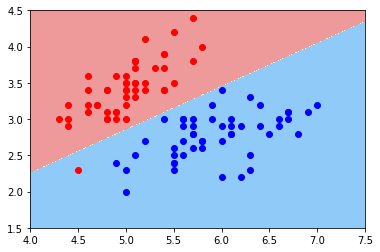

In [21]:
# 2.显示逻辑回归拟合的决策边界
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")

### 决策边界---KNN 算法

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# 1.拟合两种样本的决策边界
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
# 可以看到模型的准确度还是比较好的
knn_clf.score(X_test,y_test)

1.0

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


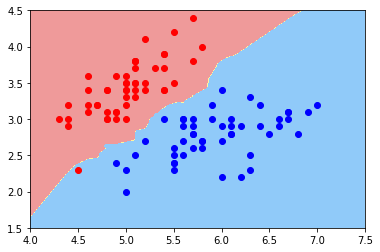

In [24]:
# 2.画出决策边界
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")

### 三种分类所组成的决策边界

In [28]:
# 1.拟合数据
knn_all_clf = KNeighborsClassifier()
#这里还是使用两种属性，但是结果的选择上，将三种结果全部进行拟合
knn_all_clf.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


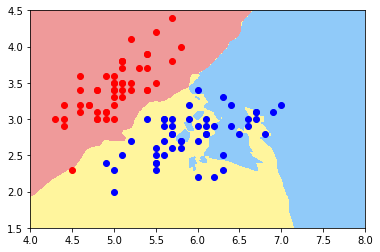

In [29]:
# 2.绘制决策边界
plot_decision_boundary(knn_all_clf, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")

### 通过决策边界判断过拟合

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


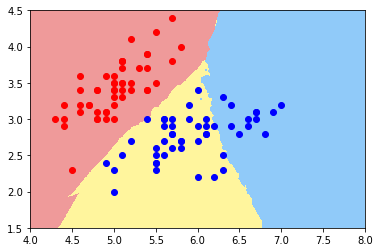

In [30]:
# 调整 knn 算法的超参数解决过拟合现象
knn_clf2 = KNeighborsClassifier(n_neighbors=50)
knn_clf2.fit(iris.data[:,:2],iris.target)
plot_decision_boundary(knn_clf2, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")